In [1]:
from dotenv import load_dotenv
import os

load_dotenv()

True

In [5]:
from entsoe import EntsoePandasClient
import pandas as pd

entsoe_client = EntsoePandasClient(api_key=os.getenv('ENTSOE_API_KEY'))

df = entsoe_client.query_load_and_forecast(
    country_code="CH", 
    start=pd.Timestamp('2013-01-01 00:00', tz="Europe/Zurich"), 
    end=pd.Timestamp('2025-01-01 00:00', tz="Europe/Zurich"),
)
df.head(5)

Forecasted Load  Actual Load
2014-10-24 00:00:00+02:00              NaN       6522.0
2014-10-24 01:00:00+02:00              NaN       6342.0
2014-10-24 02:00:00+02:00              NaN       6269.0
2014-10-24 03:00:00+02:00              NaN       6230.0
2014-10-24 04:00:00+02:00              NaN       6257.0

In [51]:
df_ = df.copy()

In [198]:
df = df_.copy()

# Actual load lineplot

In [199]:
import plotly.express as px

fig = px.line(
    df, x=df.index, y='Actual Load', 
    markers=True, 
    title='Lineplot of all the available Actual Load',
    labels={'index': 'Date', 'Actual Load': 'Actual Load [MW]'}
)

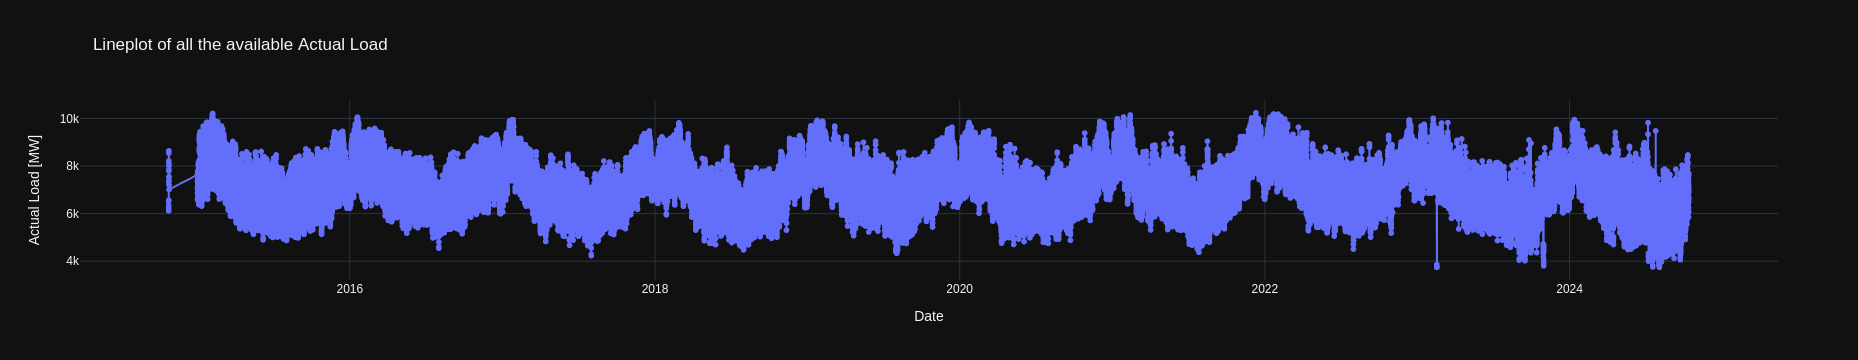

In [200]:
fig.layout.template = "plotly_dark"
fig.show()

In [201]:
fig.write_html("actual_load_lineplot.html", include_plotlyjs='cdn')

# Empty data

In [202]:
df = df_.copy()
df.head(3)

Forecasted Load  Actual Load
2014-10-24 00:00:00+02:00              NaN       6522.0
2014-10-24 01:00:00+02:00              NaN       6342.0
2014-10-24 02:00:00+02:00              NaN       6269.0

In [203]:
import plotly.express as px

df.loc[df['Actual Load'].isna(), 'color'] = 'Empty Actual Load'
df.loc[df['Forecasted Load'].isna(), 'color'] = 'Empty Forecasted Load'

mask = df.isna().any(axis=1)
fig = px.scatter(
    x=df[mask].index, y=mask[mask], color=df[mask].color,
    title='Scatterplot of the empty loads (Actual & Forecasted)',
    labels={'x': 'Date', 'y': 'Whether the data is empty', 'color': ''}
)

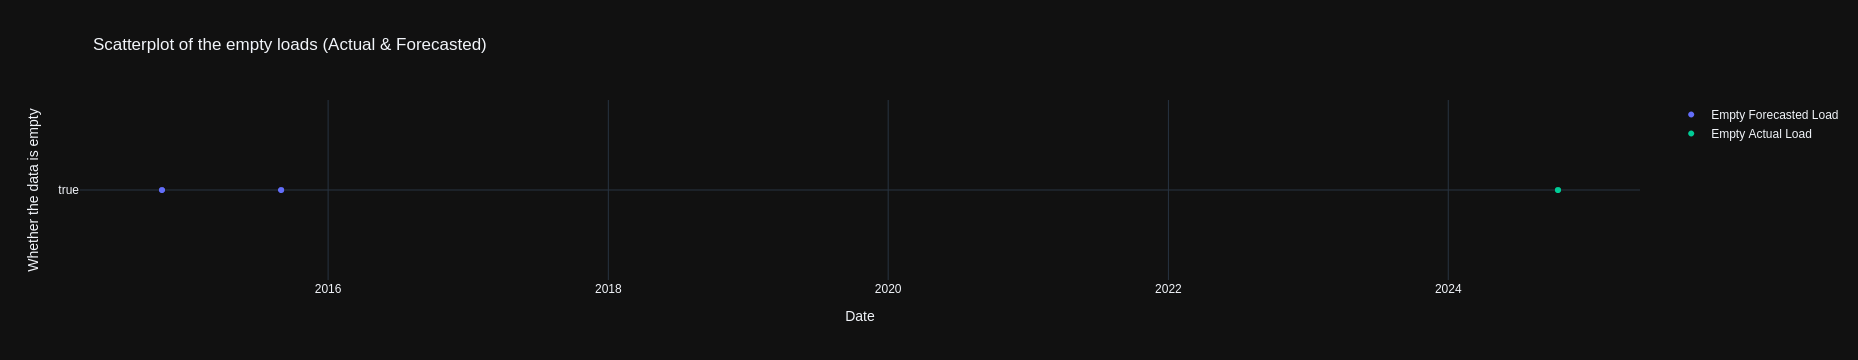

In [204]:
fig.layout.template = "plotly_dark"
fig.show()

In [205]:
fig.write_html("empty_load_lineplot.html", include_plotlyjs='cdn')

# Missing data

In [206]:
df = df_.copy()
df.head(3)

Forecasted Load  Actual Load
2014-10-24 00:00:00+02:00              NaN       6522.0
2014-10-24 01:00:00+02:00              NaN       6342.0
2014-10-24 02:00:00+02:00              NaN       6269.0

In [207]:
import plotly.express as px

df = df.asfreq('h', fill_value='FILLED')

df.loc[(df == 'FILLED').any(axis=1), 'color'] = 'Missing Load'
mask = (df == 'FILLED').any(axis=1)

fig = px.scatter(
    x=df[mask].index, y=mask[mask], color=df[mask].color,
    title='Scatterplot of the missing loads (Actual & Forecasted)',
    labels={'x': 'Date', 'y': 'Whether the data is missing', 'color': ''}
)

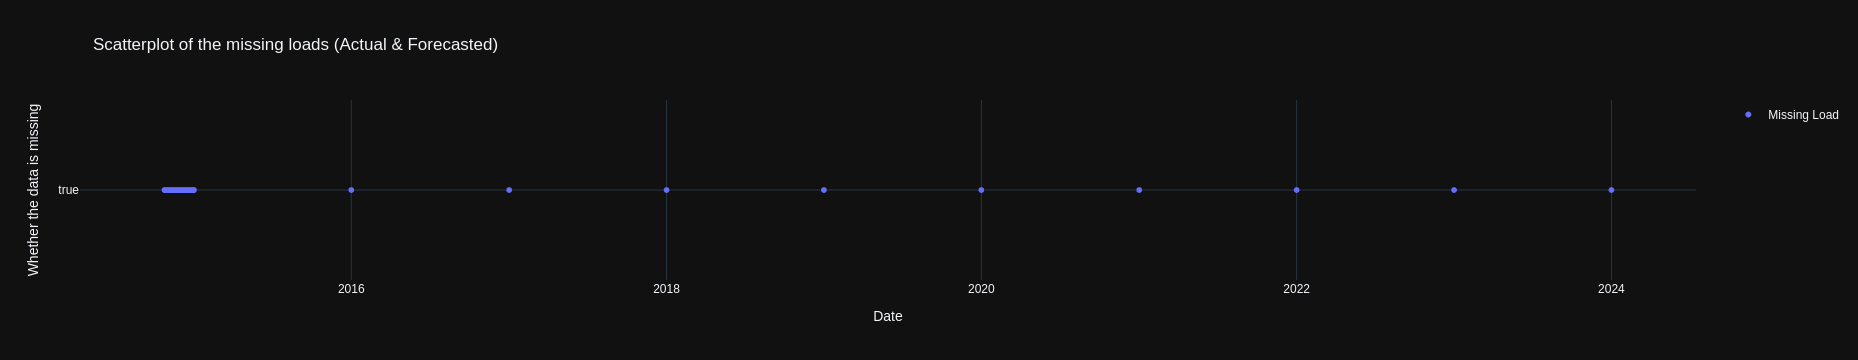

In [208]:
fig.layout.template = "plotly_dark"
fig.show()

In [209]:
fig.write_html("missing_load_lineplot.html", include_plotlyjs='cdn')

# Duplicated data

In [210]:
df = df_.copy()
df.head(3)

Forecasted Load  Actual Load
2014-10-24 00:00:00+02:00              NaN       6522.0
2014-10-24 01:00:00+02:00              NaN       6342.0
2014-10-24 02:00:00+02:00              NaN       6269.0

In [219]:
import plotly.express as px

df.index.duplicated().any()

False